In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2022)

In [3]:
# Sample Data
# 하나의 변수 X에 대해 y값을 예측
data = np.linspace(0, 6, 150)[:, np.newaxis]

label = np.sin(data).ravel() + np.sin(6 * data).ravel()
noise = np.random.normal(data.shape[0]) * 0.01
label += noise

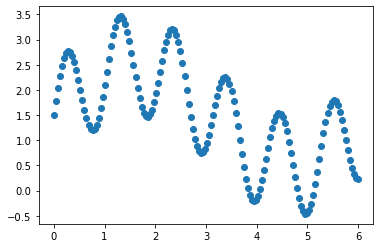

In [4]:
plt.scatter(data, label)

In [5]:
# Data Split - 시계열 데이터라 가정
train_size = 125
train_data, test_data = data[:train_size], data[train_size:]
train_label, test_label = label[:train_size], label[train_size:]

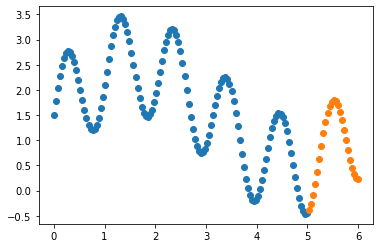

In [6]:
# 파란색이 train, 주황색이 test
plt.scatter(train_data, train_label)
plt.scatter(test_data, test_label, color="C1")

In [7]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=2)

In [8]:
# 학습
tree.fit(train_data, train_label)

DecisionTreeRegressor(max_depth=2)

In [9]:
# 예측
tree_train_pred = tree.predict(train_data)
tree_test_pred = tree.predict(test_data)

In [10]:
# 평가 MSE
from sklearn.metrics import mean_squared_error

tree_train_mse = mean_squared_error(train_label, tree_train_pred)
tree_test_mse = mean_squared_error(test_label, tree_test_pred)

In [11]:
print(f"Tree mean squared error is {tree_train_mse:.4f}")
print(f"Tree mean squared error is {tree_test_mse:.4f}")

Tree mean squared error is 0.3669
Tree mean squared error is 1.8188


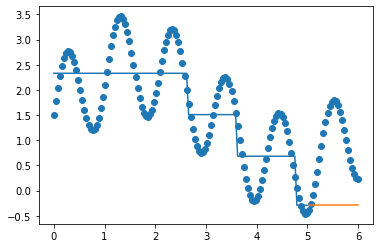

In [12]:
# 시각화
plt.scatter(data, label)
plt.plot(train_data, tree_train_pred)
plt.plot(test_data, tree_test_pred)

In [13]:
# AdaBoost
from sklearn.ensemble import AdaBoostRegressor

# depth = 1인 base_estimator
ada_boost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=1))

In [14]:
# 학습
ada_boost.fit(train_data, train_label)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1))

In [15]:
# 예측
ada_boost_train_pred = ada_boost.predict(train_data)
ada_boost_test_pred = ada_boost.predict(test_data)

In [16]:
# 평가
ada_boost_train_mse = mean_squared_error(train_label, ada_boost_train_pred)
ada_boost_test_mse = mean_squared_error(test_label, ada_boost_test_pred)

In [17]:
print(f"Ada Boost Train mean squared error is {ada_boost_train_mse:.4f}")
print(f"Ada Boost Test mean squared error is {ada_boost_test_mse:.4f}")

Ada Boost Train mean squared error is 0.4702
Ada Boost Test mean squared error is 0.5492


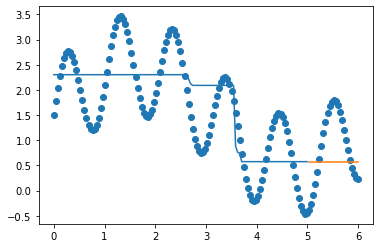

In [18]:
# 시각화
plt.scatter(data, label)
plt.plot(train_data, ada_boost_train_pred)
plt.plot(test_data, ada_boost_test_pred)

In [19]:
# Gradient Boost
from sklearn.ensemble import GradientBoostingRegressor

grad_boost = GradientBoostingRegressor(max_depth=1)

In [20]:
# 학습
grad_boost.fit(train_data, train_label)

GradientBoostingRegressor(max_depth=1)

In [21]:
# 예측
grad_boost_train_pred = grad_boost.predict(train_data)
grad_boost_test_pred = grad_boost.predict(test_data)

In [22]:
# 평가
grad_boost_train_mse = mean_squared_error(train_label, grad_boost_train_pred)
grad_boost_test_mse = mean_squared_error(test_label, grad_boost_test_pred)

In [23]:
print(f"Gradient Boost Train mean squared error is {grad_boost_train_mse:.4f}")
print(f"Gradient Boost Test mean squared error is {grad_boost_test_mse:.4f}")

Gradient Boost Train mean squared error is 0.2767
Gradient Boost Test mean squared error is 1.3215


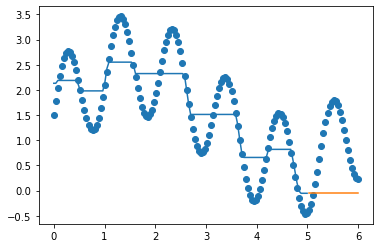

In [24]:
# 시각화
plt.scatter(data, label)
plt.plot(train_data, grad_boost_train_pred)
plt.plot(test_data, grad_boost_test_pred)

In [25]:
# 비교
print(f"Tree train mean squared error is {tree_train_mse:.4f}")
print(f"Ada Boost train mean squared error is {ada_boost_train_mse:.4f}")
print(f"Gradient Boost train mean squared error is {grad_boost_train_mse:.4f}")

Tree train mean squared error is 0.3669
Ada Boost train mean squared error is 0.4702
Gradient Boost train mean squared error is 0.2767


In [26]:
print(f"Tree test mean squared error is {tree_test_mse:.4f}")
print(f"Ada Boost test mean squared error is {ada_boost_test_mse:.4f}")
print(f"Gradient Boost test mean squared error is {grad_boost_test_mse:.4f}")

Tree test mean squared error is 1.8188
Ada Boost test mean squared error is 0.5492
Gradient Boost test mean squared error is 1.3215


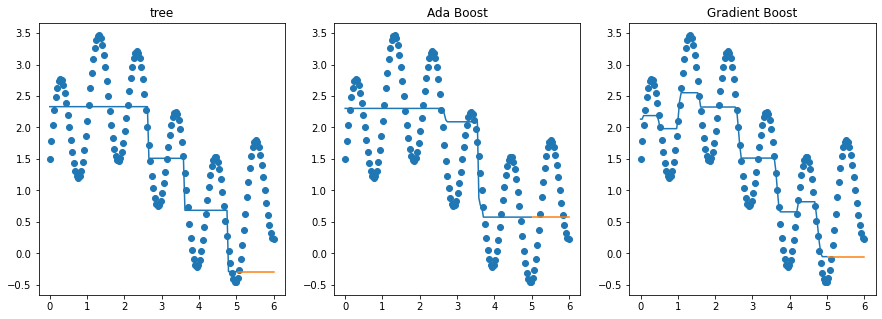

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
preds = [
    ("tree", tree_train_pred, tree_test_pred),
    ("Ada Boost", ada_boost_train_pred, ada_boost_test_pred),
    ("Gradient Boost", grad_boost_train_pred, grad_boost_test_pred)
]
for idx, (name, train_pred, test_pred) in enumerate(preds):
    ax = axes[idx]
    ax.scatter(data, label)
    ax.plot(train_data, train_pred)
    ax.plot(test_data, test_pred)
    ax.set_title(name)